# Homework Assignment 2 

## Risk Graph

### (Notebook 2 of 2)



### <p style="text-align: right;"> &#9989; David Perez</p>
### <p style="text-align: right;"> &#9989; TumsAddict</p>

## Assignment Overview

In this assignment, we'll explore graphs using the board game Risk as our practical example. Risk is a strategy game played on a world map where territories are connected to their neighbors. This makes it a perfect candidate for graph representation and analysis.

### Learning Objectives

- Implement a graph representation of a real-world game board
- practice using networkx
- do some research
- visualize graph data using NetworkX

The assignment is split into two notebooks:
- Notebook 1 of 2 is worth **14 + 33 + 3 = 51 points** 
- Notebook 2 of 2 is worth **1+ 42 + 1 = 44 points** 
for a total of **95 points**. Point values for each part are included in the section headers and question prompts.

**This assignment is due at 11:59 pm on Friday, March 21st.** It should be uploaded into the "Homework Assignments" submission folder for Homework #2 on D2L.  Submission instructions can be found at the end of the notebook. **You must also fill out a survey regarding this assignment.** The link to this survey can also be found at the end of the notebook.

---
## &#128721; STOP
**Pause to add this file and commit your changes to your Git repository! (1 points)**

---

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import pandas as pd
import numpy as np

---
<a id="part3"></a>
[Back to ToC](#toc)

## Part 3: Creating the Risk Game Graph (42 points)


![image](https://cf.geekdo-images.com/JM6hEipDwIByZKEIK9Dgeg__imagepage/img/OEl2gaJbUxdvIv6tNPzDsQyLUtQ=/fit-in/900x600/filters:no_upscale():strip_icc()/pic365731.jpg)


&#9989; **Question 3.1 (5 points)**: Create a dictionary that defines the territories in Risk, organized by continents. Each territory should include its neighboring territories. Use the image above for completing the code below

In [19]:
# Define the Risk board territories and their connections
risk_territories = {
    'North America': {
        'Alaska': ['Northwest Territory', 'Alberta', 'Kamchatka'],
        'Northwest Territory': ['Alaska', 'Alberta', 'Greenland'],
        'Greenland': ['Northwest Territory', 'Ontario', 'Quebec', 'Iceland'],
        'Alberta': ['Alaska', 'Northwest Territory', 'Ontario', 'Western United States'],
        'Ontario': ['Alberta', 'Northwest Territory', 'Greenland', 'Quebec', 'Western United States', 'Eastern United States'],
        'Quebec': ['Ontario', 'Greenland', 'Eastern United States'],
        'Western United States': ['Alberta', 'Ontario', 'Eastern United States', 'Central America'],
        'Eastern United States': ['Western United States', 'Ontario', 'Quebec', 'Central America'],
        'Central America': ['Western United States', 'Eastern United States', 'Venezuela']
    },
    # Complete the remaining continents
    'South America': {
        # Add territories and their connections
        'Venezuela':['Brazil', 'Peru', 'Central America'],
        'Brazil': ['Peru', 'Venezuela', 'North Africa', 'Argentina'],
        'Argentina': ['Peru', 'Brazil'],
        'Peru': ['Venezuela','Argentina', 'Brazil']
    },
    'Europe': {
        # Add territories and their connections
        'Ukraine': ['Scandinavia','Northern Europe', 'Southern Europe', 'Ural', 'Afghanistan', 'Middle East'],
        'Scandinavia': ['Ukraine', 'Northern Europe', 'Iceland', 'Great Britain'],
        'Iceland': ['Scandinavia', 'Great Britain', 'Greenland'],
        'Great Britain': ['Iceland', 'Scandinavia', 'Western Europe', 'Northern Europe'],
        'Northern Europe': ['Ukraine', 'Scandinavia', 'Great Britain', 'Western Europe', 'Southern Europe' ],
        'Western Europe': ['Northern Europe', 'Southern Europe', 'Great Britain', 'North Africa'],
        'Southern Europe': ['Northern Europe', 'Western Europe', 'Ukraine', 'North Africa', 'Egypt', 'Middle East']
    },
    'Africa': {
        # Add territories and their connections
        'North Africa': ['Western Europe', 'Southern Europe', 'Egypt', 'Brazil', 'East Africa', 'Congo'],
        'Egypt': ['Southern Europe', 'Middle East', 'East Africa', 'North Africa'],
        'East Africa': ['Egypt', 'North Africa', 'Congo', 'Middle East', 'South Africa', 'Madagascar'],
        'Congo': ['North Africa', 'East Africa', 'South Africa'],
        'South Africa': ['Congo', 'East Africa', 'Madagascar'],
        'Madagascar': ['East Africa', 'South Africa']
    },
    'Asia': {
        # Add territories and their connections
        'Middle East': ['Ukraine', 'Southern Europe', 'Egypt', 'East Africa', 'India', 'Afghanistan', ],
        'Afghanistan': ['Ural', 'Ukraine', 'Middle East', 'India', 'China'],
        'India': ['China', 'Afghanistan', 'Siam', 'Middle East'],
        'Siam': ['China', 'India', 'Indonesia'],
        'China': ['Mongolia', 'Siberia', 'Ural', 'Afghanistan', 'India', 'Siam'],
        'Ural': ['Siberia', 'Ukraine', 'China', 'Afghanistan'],
        'Mongolia': ['Japan', 'Irkutsk', 'Kamchatka', 'Siberia', 'China'],
        'Siberia': ['Yakutsk', 'Irkutsk', 'Mongolia', 'China', 'Ural'],
        'Irkutsk': ['Kamchatka', 'Yakutsk', 'Siberia', 'Mongolia'],
        'Yakutsk': ['Kamchatka', 'Irkutsk', 'Siberia'],
        'Japan': ['Kamchatka', 'Mongolia'],
        'Kamchatka': ['Yakutsk', 'Irkutsk', 'Mongolia', 'Japan', 'Alaska']
    },
    'Australia': {
        # Add territories and their connections
        'Indonesia': ['Siam', 'New Guinea', 'Western Australia'],
        'New Guinea': ['Indonesia', 'Eastern Australia', 'Western Australia'],
        'Western Australia': ['Eastern Australia', 'Indonesia', 'New Guinea'],
        'Eastern Australia': ['Western Australia', 'New Guinea', 'Indonesia']
    }
}


### Graph Creation

&#9989; **Question 3.2 (7 points)**: Create a NetworkX graph object from the territory definitions. The territories are the nodes of the graph. Implement a function that builds the graph and adds appropriate attributes for continents. _Hint:_ Look up the documentation of `add_node`, what are the possible inputs? Don't forget to connect each territory to its neighbors. Make sure to add plenty of comments in your code.

In [20]:
def create_risk_graph(territories):
    """
    Create a NetworkX graph from the Risk territory definitions.
    
    Parameters:
        territories (dict): Dictionary containing territory and connection information
        
    Returns:
        G (nx.Graph): NetworkX graph representing the Risk board
    """
    graph = nx.Graph()

    # Iterate over each continent and its territories
    for continent, territories in risk_territories.items():
        for territory, neighbors in territories.items():
            # Add the territory as a node with a 'continent' attribute
            graph.add_node(territory, continent=continent)

            # Add edges between the territory and its neighbors
            for neighbor in neighbors:
                graph.add_edge(territory, neighbor)

    return graph

G = create_risk_graph(risk_territories)



### Graph Visualization

&#9989; **Question 3.3 (4 points)**: Create a visualization of the Risk board graph. You can use AI to help you with this. The function below should:

- make a plot of the risk graph.
- color nodes by continent
- allow the user to choose a type of layout. _Hint:_ search networkx documentation for the possible layout. Min 5 layouts should be available.
- print the name of each territory on the respective node
- make a legend for the graph 
- have very descriptive comments 
- increase the size of each node from the default value  
- increase the font size of label from the default value

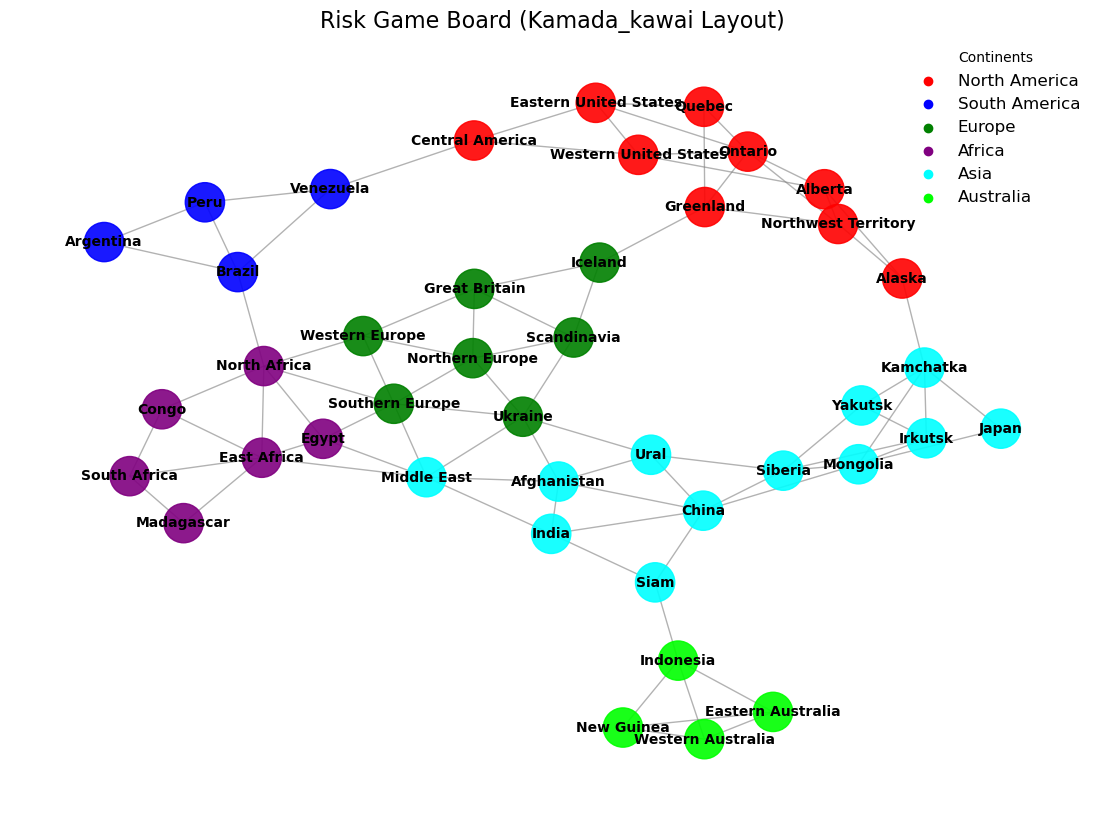

In [31]:
def visualize_risk_graph(graph, layout_type='spring'):
    """
    Visualize the Risk board graph using NetworkX and Matplotlib.

    Parameters:
        graph (nx.Graph): The NetworkX graph representing the Risk board.
        layout_type (str): The type of layout to use. Options: 'spring', 'circular', 'kamada_kawai', 'random', 'shell'.
    """
    # Define continent colors for node coloring
    continent_colors = {
        'North America': 'red',
        'South America': 'blue',
        'Europe': 'green',
        'Africa': 'purple',
        'Asia': 'aqua',
        'Australia': 'lime'
    }

    # Assign colors to nodes based on their continent
    node_colors = [continent_colors[data['continent']] for node, data in graph.nodes(data=True)]

    # Choose the layout based on user input
    if layout_type == 'spring':
        pos = nx.spring_layout(graph, seed=42)  # Spring layout with reproducible seed
    elif layout_type == 'circular':
        pos = nx.circular_layout(graph)  # Circular layout
    elif layout_type == 'kamada_kawai':
        pos = nx.kamada_kawai_layout(graph)  # Kamada-Kawai layout
    elif layout_type == 'random':
        pos = nx.random_layout(graph)  # Random layout
    elif layout_type == 'shell':
        pos = nx.shell_layout(graph)  # Shell layout
    else:
        raise ValueError(f"Invalid layout type: {layout_type}. Choose from 'spring', 'circular', 'kamada_kawai', 'random', 'shell'.")

    # Create a figure and draw the graph
    plt.figure(figsize=(14, 10))

    # Draw nodes with increased size and continent-based coloring
    nx.draw_networkx_nodes(
        graph,
        pos,
        node_size=800,  # Increase node size
        node_color=node_colors,
        alpha=0.9
    )

    # Draw edges
    nx.draw_networkx_edges(
        graph,
        pos,
        edge_color='gray',
        alpha=0.6
    )

    # Draw node labels with increased font size
    nx.draw_networkx_labels(
        graph,
        pos,
        font_size=10,  # Increase font size
        font_weight='bold',
        font_color='black'
    )

    # Add a legend for continent colors
    for continent, color in continent_colors.items():
        plt.scatter([], [], c=color, label=continent)  # Add dummy scatter points for legend
    plt.legend(scatterpoints=1, frameon=False, title="Continents", fontsize=12)

    # Add a title
    plt.title(f"Risk Game Board ({layout_type.capitalize()} Layout)", fontsize=16)

    # Remove axis for a cleaner look
    plt.axis('off')

    # Show the plot
    plt.show()

# Example usage
if __name__ == "__main__":
    # Create the Risk graph
    G = create_risk_graph(risk_territories)

    # Visualize the graph with a chosen layout
    visualize_risk_graph(G, layout_type='kamada_kawai')  # Change layout_type to 'circular', 'kamada_kawai', etc.

&#9989; **Question 3.4 (26 points)**: Answer the following questions based on the Risk board graph visualization. Each answer should have a minimum of 1-2 sentences and snippet of the code that supports your answer. You must explain what each function in the code snippet does. 

All answers should be in the same markdown cell. 

The code snippet should be properly displayed using code markdown. 

1. Which layout type provides the best visualization of the continent-based clustering in the Risk board graph?
    - Explain the rationale behind your choice of layout.
2. Do a little research and explain what the Kamada-Kawai layout does? Make sure to cite your sources.
3. Which part of the code is used to assign the color of each node based on its continent?
4. How did you make the legend? Explain any non-obvious part of the code.
5. What colormap did you choose for the continents and how did you import the colormap? 
6. How did you set the node size and font size in the visualization?
7. How did you print the labels for the nodes? 

✎
1. I believe the best layout of choice for me was the Kamada-Kawi layout. The data is the most readable and interpretable. Each sub territory is neatly keep together, and the lines connecting them are clear. 
2. Kamada-Kawai graphs can also be called force directed graphs. These graphs are constructed using algorithms that optimize for edge efficiency. The idea is that we correct outlier edge lengths so they are more or less equal to each other. One of the ways this gets accomplished involves modeling the nodes and edges like electrons, and modeling their behavior using coulombs law.
3. There are two lines specifically I use. The first line creates a list that assigns colors to a variable with the same name as a territory. The second line matches each variable with the identical name in the territory dictionary
4. The legend was made using a 'dummy' scatterplot because NetworkX doesn't allow a legend for colors. Taking a for loop, we iterate over each continent, with it's assigned color being the same as the map. 
5. I did not use a colormap. I manually defined a dictionary called continent_colors to map each continent to a specific color. This approach was chosen for simplicity and clarity, as it allows us to  assign colors to continents without relying on a colormap.
6. I arbitrarily chose sizes until I found one that looked the best in the displayed graph. 
7. The labels for the nodes are printed using the nx.draw_networkx_labels function in NetworkX. It adds the names of each node on top of the node that it represents.


---
## &#128721; STOP
**Pause to commit your changes to your Git repository! (1 points)**

Take a moment to save your notebook, commit the changes to your Git repository using the commit message "**Committing Part 3**", no need to push the changes to GitHub yet, but you can if you want.

---
## Assignment wrap-up

Please fill out the form that appears when you run the code below.  **You must completely fill this out in order to receive credit for the assignment!**

In [ ]:
from IPython.display import HTML
HTML(
"""
<iframe 
	src="https://forms.office.com/r/mB0YjLYvAA" 
	width="800px" 
	height="600px" 
	frameborder="0" 
	marginheight="0" 
	marginwidth="0">
	Loading...
</iframe>
"""
)

### Congratulations, you're done!

If you like, you can upload this file to D2L for a record. Nevertheless, **we will grade the copy on GitHub**. 


&#169; Copyright 2025,  Department of Computational Mathematics, Science and Engineering at Michigan State University